# Momentum

    1. The SPY is higher than X days ago, buy
    2. If the SPY is lower than X days ago, sell your long position.
    
    (optimize for number of days)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
#end = datetime.datetime(2010, 12, 1)
end = datetime.datetime.now()

Define lookback period

In [4]:
periods = range(3, 18+1)
periods = [str(period) for period in periods]

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, period=int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].get_stats()

3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 

Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'annualized_return_over_max_drawdown',
           'drawdown_recovery_period',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
annual_return_rate,6.03,6.84,8.47,8.92,7.70,9.16,9.96,9.20,9.70,9.96,9.09,9.67,10.11,9.70,9.77,10.33
max_closed_out_drawdown,-26.96,-26.66,-24.36,-25.90,-29.67,-22.04,-26.16,-30.09,-25.52,-22.88,-32.55,-29.76,-33.30,-33.30,-33.30,-27.59
annualized_return_over_max_drawdown,0.22,0.26,0.35,0.34,0.26,0.42,0.38,0.31,0.38,0.44,0.28,0.32,0.30,0.29,0.29,0.37
drawdown_recovery_period,1225.00,1531.00,1115.00,Not Recovered Yet,903.00,166.00,409.00,764.00,471.00,469.00,Not Recovered Yet,275.00,244.00,244.00,245.00,931.00
best_month,15.04,15.00,15.47,15.42,15.44,15.03,17.78,17.78,17.78,17.79,17.79,17.78,18.01,18.01,17.99,17.79
worst_month,-18.90,-18.91,-18.93,-18.94,-18.90,-18.94,-22.08,-22.09,-18.91,-18.95,-29.09,-29.09,-29.10,-29.10,-29.10,-18.91
sharpe_ratio,0.54,0.61,0.72,0.74,0.64,0.73,0.78,0.73,0.75,0.75,0.68,0.71,0.73,0.70,0.71,0.77
sortino_ratio,0.57,0.66,0.80,0.81,0.70,0.81,0.87,0.82,0.85,0.87,0.75,0.80,0.82,0.80,0.80,0.89
monthly_std,3.14,3.18,3.11,3.20,3.35,3.35,3.49,3.46,3.39,3.42,3.55,3.61,3.65,3.70,3.73,3.48
pct_time_in_market,71.48,72.43,73.81,75.20,77.06,78.06,79.01,79.29,80.11,81.77,81.03,82.10,82.19,82.65,82.20,81.89


Bar graphs

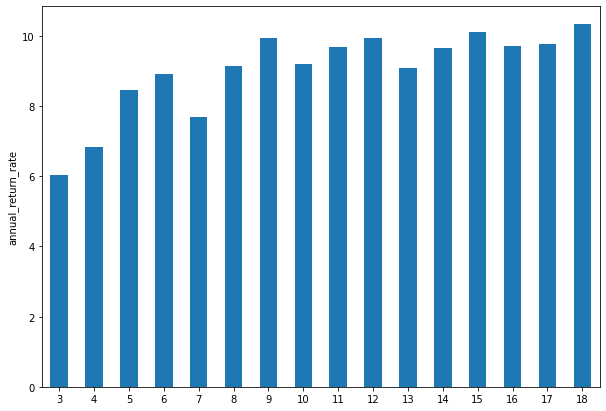

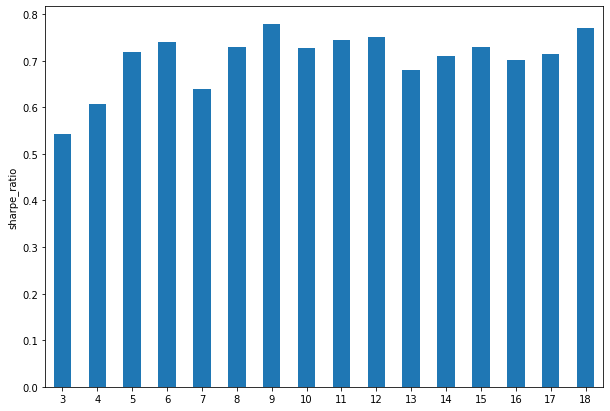

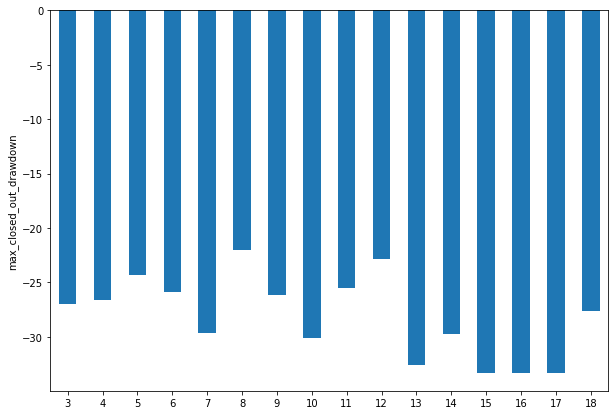

In [8]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s.start, s.end)
benchmark.run()

Equity curve

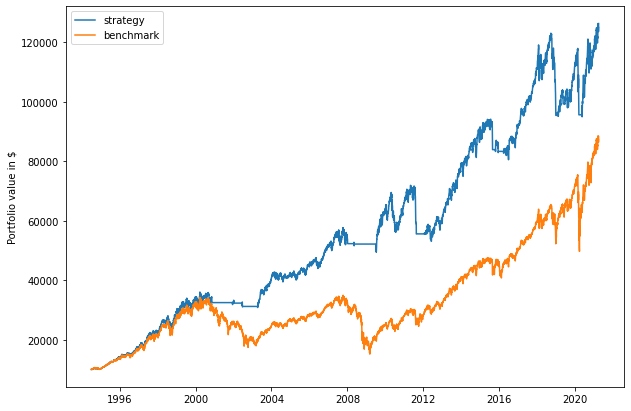

In [10]:
pf.plot_equity_curve(strategies['9'].dbal, benchmark=benchmark.dbal)